# Backgroung Story

Invistico is one of the Airlines' company who wants to span their wings further in airline industries. Invistico is aware that Service quality will build a brand, which results in Customer Satisfaction and Customer Loyalty. Invistico needs a Business Recommendations and insights to Retain their Customers without excessive costs for the required Business Idea.

# Problem Statement

The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.

Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
flight=pd.read_csv('C:/Users/Dell/Downloads/Invistico_Airline.csv')

In [3]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [4]:
flight.head(n=20)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [5]:
flight['Seat comfort'].value_counts()

3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort, dtype: int64

In [6]:
flight.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
flight.describe(include=object)

,satisfaction,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [8]:
flight.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [9]:
#data cleaning and preprocessing
flight.fillna(flight['Arrival Delay in Minutes'].mean(), inplace=True)
flight.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [10]:
flight.shape

(129880, 23)

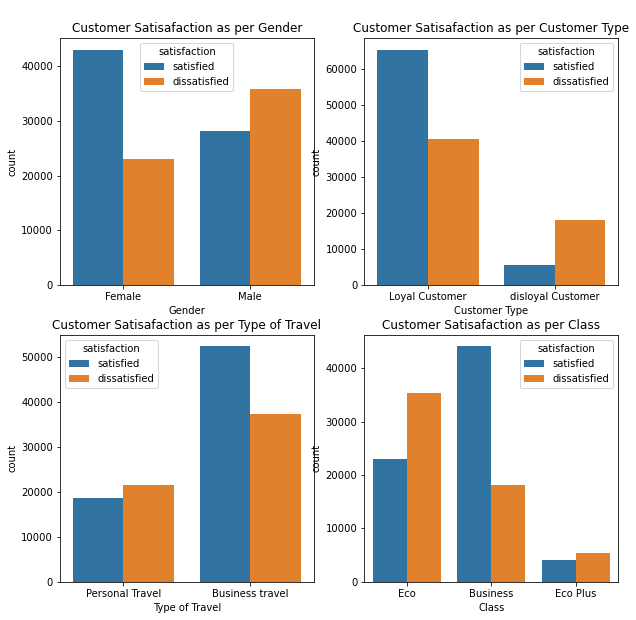

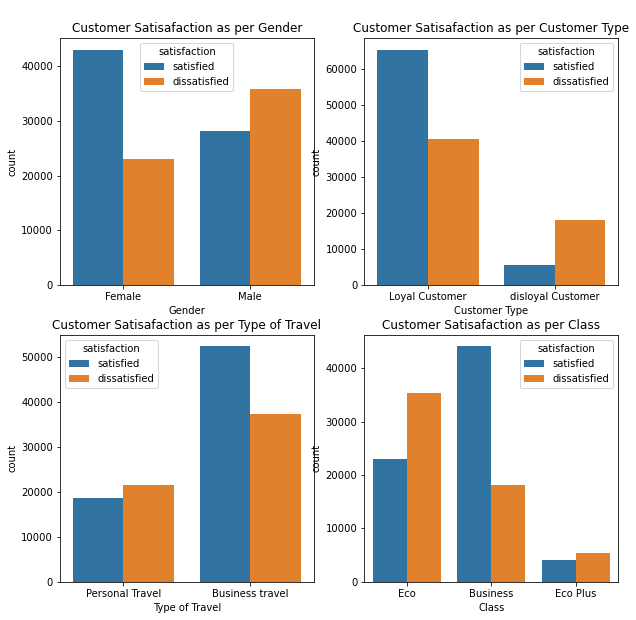

In [11]:
#EDA
fig,axs = plt.subplots(2,2,figsize=(10, 10))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2):
  for j in range(2):
    sns.countplot(data=flight,x=cols[c],hue='satisfaction',ax=axs[i][j])
    axs[i][j].set_title('\nCustomer Satisafaction as per {}'.format(cols[c]))
    c+=1
#EDA
fig,axs = plt.subplots(2,2,figsize=(10, 10))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2):
  for j in range(2):
    sns.countplot(data=flight,x=cols[c],hue='satisfaction',ax=axs[i][j])
    axs[i][j].set_title('\nCustomer Satisafaction as per {}'.format(cols[c]))
    c+=1


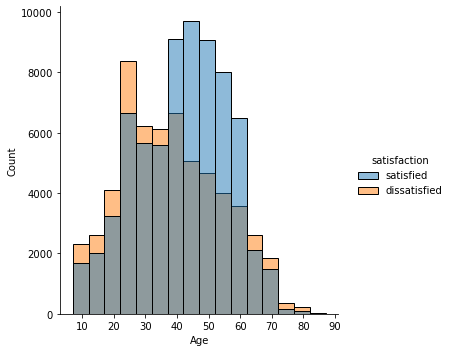

In [13]:
sns.displot(flight,x='Age',binwidth=5,hue='satisfaction')
plt.show()

# Countplot  and distributionplot conclusions :

    Female Customers have higher satisfaction than Male Customers.
    Loyal Customers have higher satisfaction than Disloyal Customers.
    Business Travel has higher customer satisfaction than Personal Travel.
    Business Class has the highest satisfaction between the 3 airlines classes.
    Customers of age group between 40 to 60 are more satisfied than customers of other age group.

In [14]:
print("Gender:",flight['Gender'].unique())
print("Customer Type:",flight['Customer Type'].unique())
print("Type of Travel:",flight['Type of Travel'].unique())
print("class:",flight['Class'].unique())
print("satisfaction:",flight['satisfaction'].unique())

le=LabelEncoder()
flight['Gender']= le.fit_transform(flight['Gender']) 
flight['Customer Type']= le.fit_transform(flight['Customer Type']) 
flight['Type of Travel']= le.fit_transform(flight['Type of Travel']) 
flight['Class']= le.fit_transform(flight['Class']) 
flight['satisfaction']= le.fit_transform(flight['satisfaction']) 

print("\nGender:",flight['Gender'].unique())
print("Customer Type:",flight['Customer Type'].unique())
print("Type of Travel:",flight['Type of Travel'].unique())
print("class:",flight['Class'].unique())
print("satisfaction:",flight['satisfaction'].unique())

Gender: ['Female' 'Male']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
class: ['Eco' 'Business' 'Eco Plus']
satisfaction: ['satisfied' 'dissatisfied']

Gender: [0 1]
Customer Type: [0 1]
Type of Travel: [1 0]
class: [1 0 2]
satisfaction: [1 0]


In [15]:
temp1 = flight.drop('satisfaction',axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = temp1.columns
vif_data["VIF"] = [variance_inflation_factor(temp1.values, i) for i in range(len(temp1.columns))]
vif_data

,feature,VIF
0,Gender,2.036589
1,Customer Type,1.653533
2,Age,7.429683
3,Type of Travel,2.449458
4,Class,2.688083
5,Flight Distance,4.627909
6,Seat comfort,12.608373
7,Departure/Arrival time convenient,8.948996
8,Food and drink,13.520578
9,Gate location,10.201175


In [16]:
flight=flight.drop(['Ease of Online booking','Cleanliness','Baggage handling'],axis=1)

In [17]:
temp1 = flight.drop('satisfaction',axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = temp1.columns
vif_data["VIF"] = [variance_inflation_factor(temp1.values, i) for i in range(len(temp1.columns))]
vif_data

,feature,VIF
0,Gender,2.017812
1,Customer Type,1.544313
2,Age,7.352765
3,Type of Travel,2.390263
4,Class,2.687377
5,Flight Distance,4.494592
6,Seat comfort,12.261149
7,Departure/Arrival time convenient,8.861109
8,Food and drink,13.459679
9,Gate location,10.163144


<AxesSubplot:>

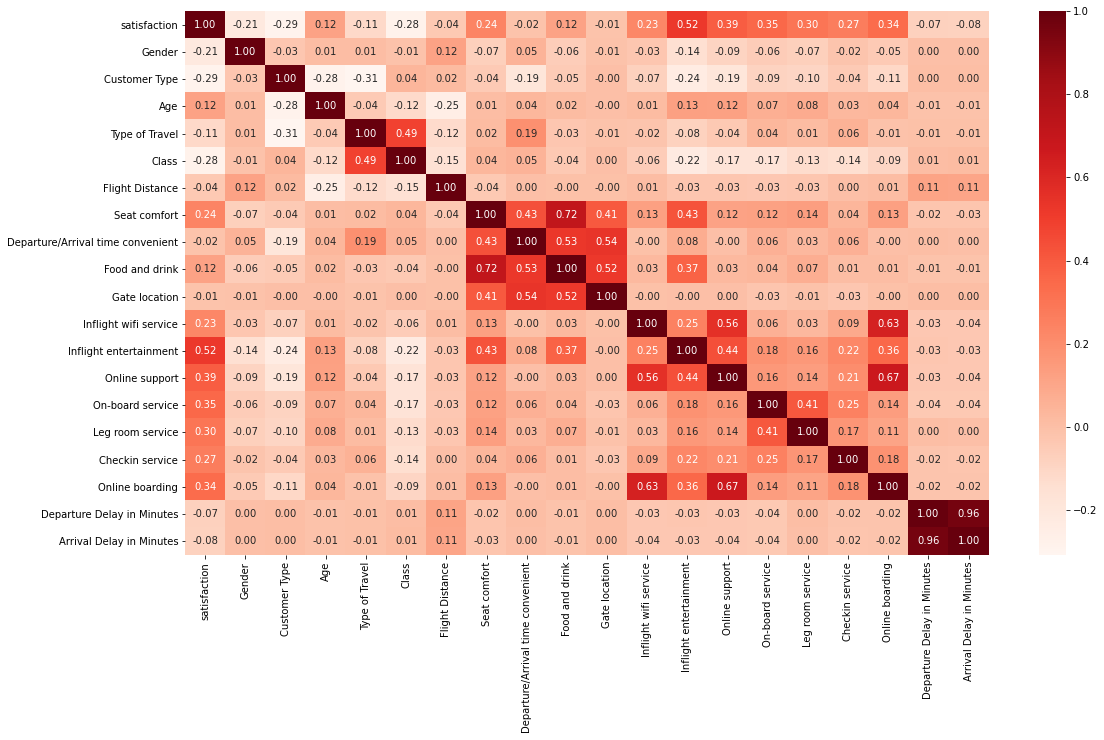

In [18]:
plt.figure(figsize=(18,10))
sns.heatmap(flight.corr(), cmap='Reds', annot=True, fmt='.2f')

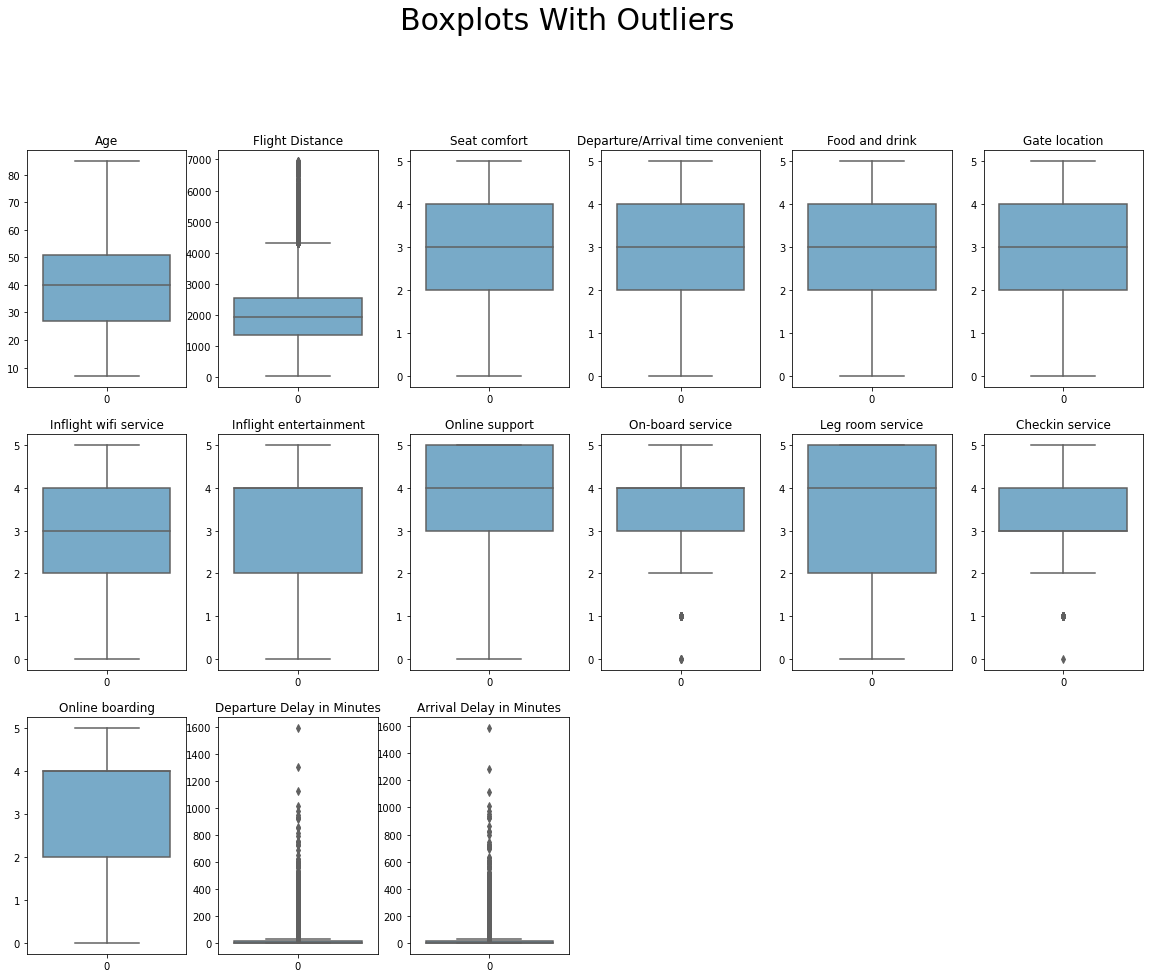

In [19]:
nonbinary_columns = [column for column in flight.columns if len(flight[column].unique()) > 3]
plt.figure(figsize=(20, 20))

for i, column in enumerate(nonbinary_columns):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(data=flight[column], palette='Blues')
    plt.title(column)

plt.suptitle('Boxplots With Outliers', size=30)
plt.show()

In [20]:
#outlier Removal using IQR

flight = flight[flight['Flight Distance']<=4000]
flight = flight[flight['On-board service']>1]
flight = flight[flight['Checkin service']>1]
flight = flight[flight['Departure Delay in Minutes']<= 50]
flight = flight[flight['Arrival Delay in Minutes']<= 50]

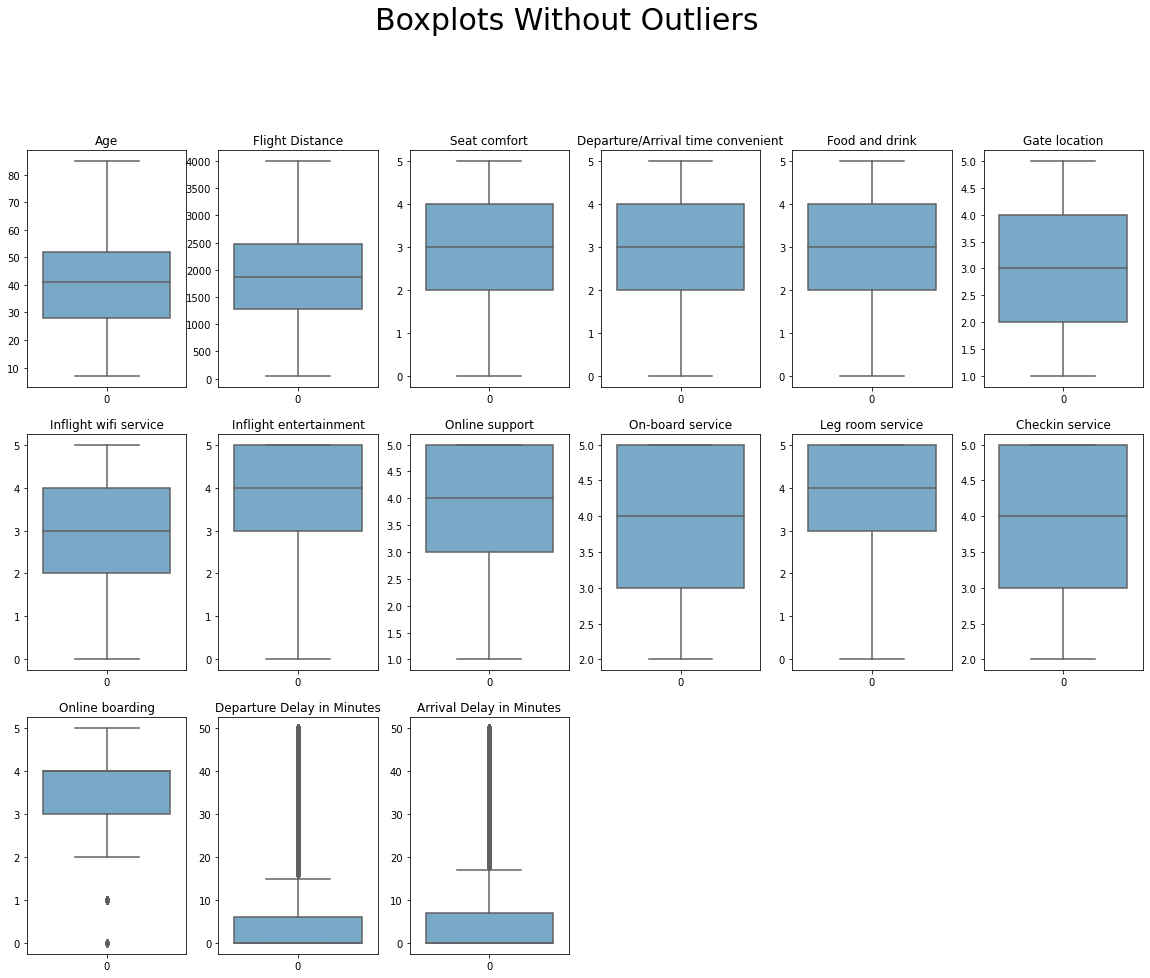

In [21]:
nonbinary_columns = [column for column in flight.columns if len(flight[column].unique()) > 3]
plt.figure(figsize=(20, 20))

for i, column in enumerate(nonbinary_columns):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(data=flight[column], palette='Blues')
    plt.title(column)

plt.suptitle('Boxplots Without Outliers', size=30)
plt.show()

In [22]:
x=flight.drop('satisfaction',axis=1)
y=flight['satisfaction']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.shape,x_test.shape

((64171, 19), (27503, 19))

In [23]:
#Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
lr=logit_model.fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.390560
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                91674
Model:                          Logit   Df Residuals:                    91655
Method:                           MLE   Df Model:                           18
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.4144
Time:                        13:32:57   Log-Likelihood:                -35804.
converged:                       True   LL-Null:                       -61141.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Gender                               -1.2074      0.019    -62.035      0.000      -1.246      -1.169
Customer Type                        -2.5418      0.028    -92.159      0.000      -2.596      -2.488
Age                                  -0.0287      0.001    -46.016      0.000      -0.030      -0.027
Type of Travel                       -1.1097      0.026    -42.318      0.000      -1.161      -1.058
Class                                -0.8807      0.018    -49.269      0.000      -0.916      -0.846
Flight Distance                      -0.0004   1.06e-05    -35.934      0.000      -0.000      -0.000
Seat comfort                          0.3182      0.011     28.049      0.000       0.296       0.340
Departure/Arrival time convenient    -0.2175      0.008    -27.834      0.000      -0.233      -0.202
Food and drink                       -0.2482      0.012    -21.565      0.000      -0.271      -0.226
Gate location                        -0.0274      0.009     -3.198      0.001      -0.044      -0.011
Inflight wifi service                -0.1611      0.010    -16.478      0.000      -0.180      -0.142
Inflight entertainment                0.5930      0.009     62.846      0.000       0.575       0.611
Online support                        0.1068      0.010     10.522      0.000       0.087       0.127
On-board service                      0.3338      0.010     33.879      0.000       0.314       0.353
Leg room service                      0.1981      0.008     24.374      0.000       0.182       0.214
Checkin service                       0.1168      0.009     12.464      0.000       0.098       0.135
Online boarding                       0.2610      0.011     24.151      0.000       0.240       0.282
Departure Delay in Minutes            0.0022      0.001      1.608      0.108      -0.000       0.005
Arrival Delay in Minutes             -0.0238      0.001    -17.675      0.000      -0.026      -0.021
=====================================================================================================
"""

# Logistic Regression Model Fitting

In [24]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_test = logreg.predict(x_test)
y_pred_train = logreg.predict(x_train)

[[ 7067  3525]
 [ 1935 14976]]


Text(0.5, 15.0, 'Predicted label')

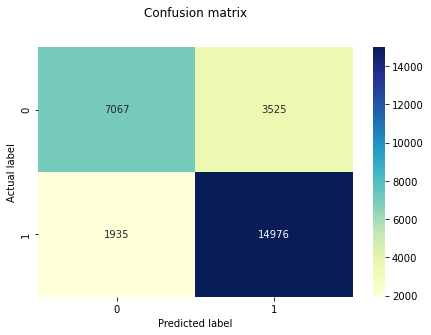

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
print(" Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print(" Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

print("\nPrecision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))

 Test Accuracy: 0.8014762025960804
 Train Accuracy: 0.7990525315173521

Precision: 0.8094697583914383
Recall: 0.8855774348057477


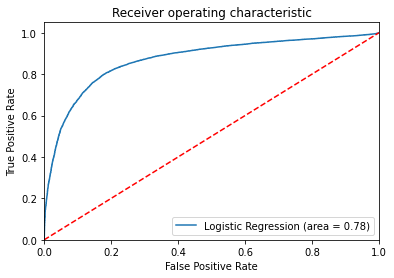

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decesion Tree

In [28]:
# Create Decision Tree classifer object
Dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
Dtc= Dtc.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = Dtc.predict(x_test)
y_pred1 = Dtc.predict(x_train)

In [29]:
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred1))

print("\nPrecision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Test Accuracy: 0.9326618914300259
Train Accuracy: 1.0

Precision: 0.9458755255521999
Recall: 0.9445331441073858


# RANDOM FOREST

In [30]:
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)
y_pred_c1 = classifier.predict(x_test)
y_pred_c2 = classifier.predict(x_train)

In [31]:
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_c1))
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_c2))

print("\nPrecision:",metrics.precision_score(y_test, y_pred_c1))
print("Recall:",metrics.recall_score(y_test, y_pred_c1))

Test Accuracy: 0.9555321237683162
Train Accuracy: 0.9999064998207913

Precision: 0.9664050422166726
Recall: 0.9610904145230915


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred_c1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_c1)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[10027   565]
 [  658 16253]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10592
           1       0.97      0.96      0.96     16911

    accuracy                           0.96     27503
   macro avg       0.95      0.95      0.95     27503
weighted avg       0.96      0.96      0.96     27503



# Conclusion 1:
After using Machine Learning to analyze customer satisfaction, we find that Logistic regression is the best machine learning model to predict our customer satisfaction data.

This model isn't Overfitting or Underfitting since the the accuracy differences between train and test data is almost equal.


Feature: 0, Score: -0.36874
Feature: 1, Score: -0.39738
Feature: 2, Score: -0.01655
Feature: 3, Score: -0.25712
Feature: 4, Score: -0.59506
Feature: 5, Score: -0.00038
Feature: 6, Score: 0.20318
Feature: 7, Score: -0.31199
Feature: 8, Score: -0.01198
Feature: 9, Score: -0.16916
Feature: 10, Score: -0.26451
Feature: 11, Score: 0.80657
Feature: 12, Score: 0.23405
Feature: 13, Score: 0.12554
Feature: 14, Score: 0.23114
Feature: 15, Score: -0.12970
Feature: 16, Score: 0.08528
Feature: 17, Score: 0.00243
Feature: 18, Score: -0.02279


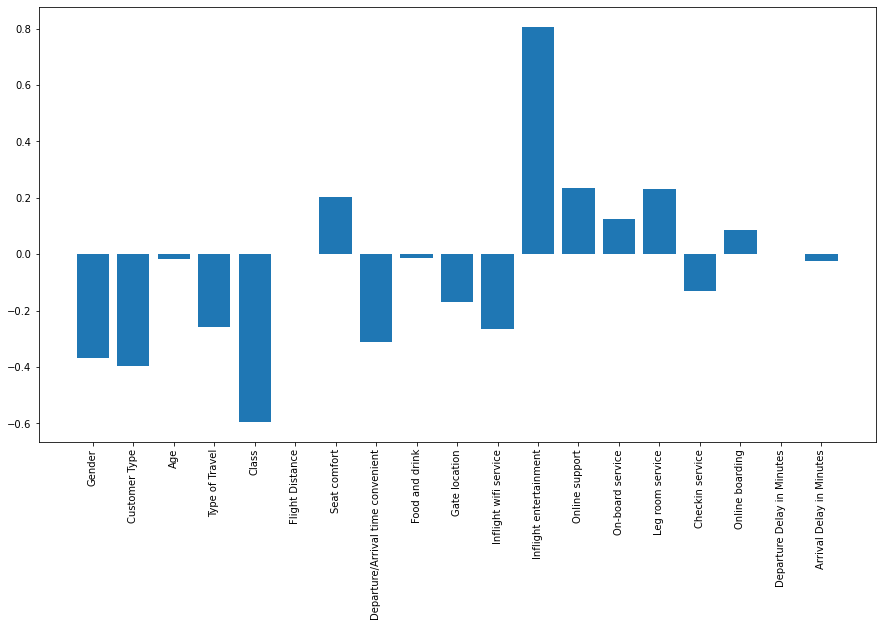

In [33]:
# get importance
importance = logreg.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    # plot feature importance
plt.figure(figsize=(15,8))
plt.bar(x.columns,importance)
plt.xticks(rotation=90)
plt.show()

# Conclusion 2:
There are 4 services that are highly affects customer satisfaction in this Airlines data :

    Inflight Entertainment
    online support
    leg room service
    seat comfort
Invistico Airlines can choose to upgrade/investing more money and effort in those 4 services to improve their customer satisfactions.